# Data Understanding

## 1. Pendahuluan

Tahapan **Data Understanding** adalah fase awal dalam siklus hidup proyek data science. Tujuannya adalah untuk mendapatkan pemahaman mendalam tentang data yang akan digunakan. Pada tahap ini, kita akan melakukan analisis eksplorasi awal untuk mengidentifikasi karakteristik, kualitas, dan pola dalam data. Proses ini sangat krusial karena kualitas data akan sangat memengaruhi kualitas model yang akan dibangun.

Dokumen ini akan memandu proses *data understanding* yang meliputi:

- **Menghubungkan dan mengambil data** dari database PostgreSQL.
- **Menganalisis tipe data** dari setiap kolom.
- **Mengevaluasi kualitas data**, termasuk analisis outlier, konsistensi data, dan penanganan missing value.


## 2. Impor Library yang Dibutuhkan
Sel pertama ini berisi semua library Python yang akan kita gunakan selama proses analisis. Mengumpulkannya di satu tempat membuat kode lebih terorganisir.

In [2]:
%pip install -q psycopg2-binary sqlalchemy pandas numpy seaborn
# Import library untuk koneksi database
import psycopg2
from sqlalchemy import create_engine
# Import library untuk analisis dan manipulasi data
import pandas as pd
import numpy as np
# Import library untuk visualisasi (opsional, namun sangat membantu)
import seaborn as sns
import matplotlib.pyplot as plt


Note: you may need to restart the kernel to use updated packages.


## 3. Koneksi ke Database PostgreSQL dan Pengambilan Data
Langkah selanjutnya adalah menghubungkan notebook ini dengan database PostgreSQL tempat data disimpan. Kita akan menggunakan sqlalchemy untuk membuat koneksi dan pandas untuk mengeksekusi query SQL dan menyimpannya ke dalam DataFrame.

Ganti nilai user, password, host, port, database, dan query sesuai dengan konfigurasi Anda.

In [3]:
# Ganti dengan kredensial database PostgreSQL Anda
db_user = 'avnadmin'
db_password = 'AVNS_9tlb724wsVZP8tiktZC'
db_host = 'zulfri-psd-data-science-zulfri.f.aivencloud.com'
db_port = '18222'
db_name = 'defaultdb'

# Membuat connection string
conn_string = f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}'

# Membuat engine koneksi ke database
try:
    engine = create_engine(conn_string)
    print("Koneksi ke database PostgreSQL berhasil!")
except Exception as e:
    print(f"Terjadi kesalahan saat koneksi: {e}")

# --- PENGAMBILAN DATA ---
# Tulis query SQL untuk mengambil data yang Anda butuhkan
sql_query = "SELECT * FROM data_penjualan;"

# Mengambil data menggunakan pandas dan koneksi engine
try:
    df = pd.read_sql(sql_query, engine)
    print("Data berhasil diambil dari tabel.")
except Exception as e:
    print(f"Terjadi kesalahan saat mengambil data: {e}")

# Menampilkan 5 baris pertama dari data untuk memastikan data berhasil dimuat
df.head()

Koneksi ke database PostgreSQL berhasil!
Data berhasil diambil dari tabel.


,order_id,customer_id,nama_produk,jumlah,harga_satuan,tanggal_order,status_pengiriman,rating_produk
0,1,101,Laptop,1,12000000.0,2025-07-01,Selesai,5.0
1,2,102,Mouse,2,150000.0,2025-07-01,Selesai,4.0
2,3,103,Keyboard,1,350000.0,2025-07-02,Dikirim,5.0
3,4,101,laptop,1,12500000.0,2025-07-03,Selesai,4.0
4,5,104,Monitor,120,2500000.0,2025-07-04,Selesai,3.0


## 4. Memahami Tipe Data (Data Types)
Setelah data berhasil dimuat ke dalam DataFrame, langkah pertama dalam data understanding adalah memeriksa tipe data dari setiap kolom. Ini membantu kita memahami jenis informasi yang terkandung di dalamnya (misalnya, numerik, kategorikal, atau tanggal) dan merencanakan langkah analisis selanjutnya.

Metode .info() dari pandas memberikan ringkasan lengkap, termasuk jumlah entri, nama kolom, jumlah nilai non-null, dan tipe data.

In [4]:
# Menampilkan informasi ringkas tentang DataFrame
# Ini mencakup tipe data setiap kolom dan jumlah nilai non-null
print("Informasi Umum DataFrame:")
df.info()

Informasi Umum DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_id           50 non-null     int64  
 1   customer_id        50 non-null     int64  
 2   nama_produk        48 non-null     object 
 3   jumlah             50 non-null     int64  
 4   harga_satuan       50 non-null     float64
 5   tanggal_order      50 non-null     object 
 6   status_pengiriman  50 non-null     object 
 7   rating_produk      44 non-null     float64
dtypes: float64(2), int64(3), object(3)
memory usage: 3.3+ KB


**Penjelasan Hasil:**

Dari output di atas, kita dapat melihat daftar semua kolom beserta tipe datanya (`int64`, `float64`, `object`, dll.). Perhatikan kolom mana yang memiliki tipe data yang belum sesuai, misalnya kolom tanggal yang masih terbaca sebagai `object` atau angka yang seharusnya numerik namun bertipe `object`. Jika ditemukan ketidaksesuaian tipe data, kita perlu melakukan konversi tipe data pada tahap *Data Preparation*.

## 5. Analisis Kualitas Data (Data Quality)
Kualitas data adalah fondasi dari analisis yang andal. Di sini kita akan memeriksa tiga aspek utama: missing value, konsistensi data, dan outlier.

### a. Missing Value
Missing value (nilai yang hilang) adalah nilai yang tidak tercatat dalam dataset. Kehadirannya dapat mengurangi akurasi model dan menyebabkan bias. Langkah pertama adalah mengidentifikasi dan menghitungnya.

In [5]:
# Menghitung jumlah missing value di setiap kolom
missing_values = df.isnull().sum()

# Menghitung persentase missing value
missing_percentage = (missing_values / len(df)) * 100

# Membuat DataFrame untuk menampilkan hasilnya
missing_info = pd.DataFrame({
    'Jumlah Missing': missing_values,
    'Persentase Missing (%)': missing_percentage
})

# Menampilkan kolom yang memiliki missing value saja (diurutkan dari yang terbanyak)
missing_info[missing_info['Jumlah Missing'] > 0].sort_values(
    by='Jumlah Missing', ascending=False)

,Jumlah Missing,Persentase Missing (%)
rating_produk,6,12.0
nama_produk,2,4.0


**Penjelasan Hasil:**

Output di atas menunjukkan kolom mana saja yang memiliki nilai yang hilang, berapa jumlahnya, dan berapa persentasenya dari total data. Informasi ini akan menjadi dasar untuk memutuskan strategi penanganan missing value di tahap Data Preparation (misalnya, dihapus, diisi dengan mean/median/modus, atau menggunakan metode imputasi yang lebih canggih).

### b. Konsistensi Data
Konsistensi data memastikan bahwa tidak ada data yang duplikat atau kontradiktif. Salah satu cara paling dasar untuk memeriksa konsistensi adalah dengan mencari baris data yang identik (duplicate rows).

In [6]:
# Menghitung jumlah baris duplikat
duplicate_rows = df.duplicated().sum()

print(f"Jumlah baris duplikat dalam dataset: {duplicate_rows}")

# Jika ditemukan duplikat, Anda bisa menampilkannya (opsional)
if duplicate_rows > 0:
    print("\nContoh baris duplikat:")
    # Menampilkan semua baris yang terduplikasi
    display(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)))

Jumlah baris duplikat dalam dataset: 0


**Penjelasan Hasil:**

Jika duplicate_rows lebih dari 0, artinya ada entri data yang sama persis. Duplikasi ini bisa terjadi karena kesalahan input atau proses ETL (Extract, Transform, Load). Data duplikat harus ditangani (biasanya dengan menghapusnya) karena dapat memberikan bobot yang tidak semestinya pada data tertentu saat pelatihan model.

### c. Analisis Outlier (IQR Method)
Outlier adalah titik data yang berbeda secara signifikan dari observasi lainnya. Outlier dapat memengaruhi hasil analisis statistik dan performa model. Salah satu metode yang paling umum untuk mendeteksi outlier pada data numerik adalah metode Interquartile Range (IQR).

Sebuah nilai dianggap outlier jika berada di luar rentang:

$$
\text{Batas Bawah} = Q_1 - 1.5 \times IQR
$$

$$
\text{Batas Atas} = Q_3 + 1.5 \times IQR
$$

$$
IQR = Q_3 - Q_1
$$


Kolom numerik yang akan dianalisis: ['order_id', 'customer_id', 'jumlah', 'harga_satuan', 'rating_produk']

--- Analisis Outlier untuk Kolom: 'order_id' ---
Q1: 13.25, Q3: 37.75, IQR: 24.50
Batas Bawah: -23.50
Batas Atas: 74.50
Jumlah outlier terdeteksi: 0


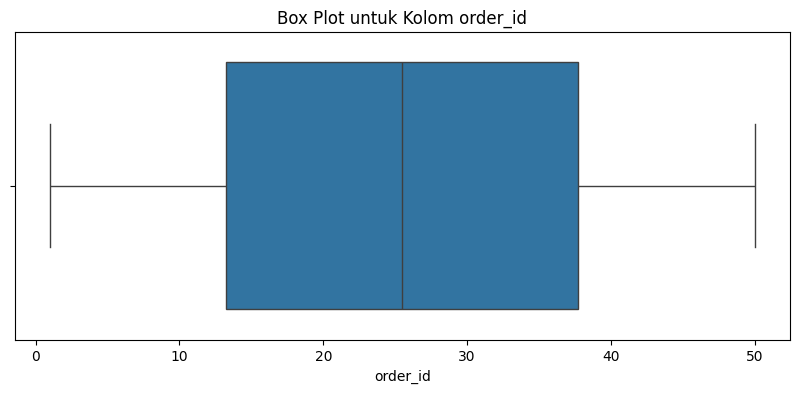



--- Analisis Outlier untuk Kolom: 'customer_id' ---
Q1: 106.25, Q3: 127.75, IQR: 21.50
Batas Bawah: 74.00
Batas Atas: 160.00
Jumlah outlier terdeteksi: 0


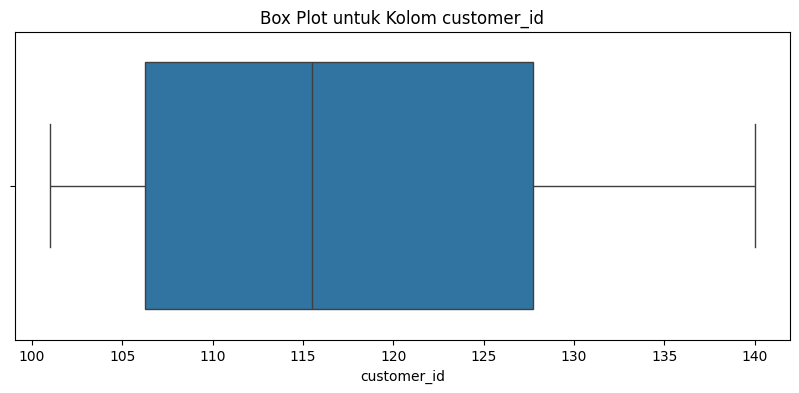



--- Analisis Outlier untuk Kolom: 'jumlah' ---
Q1: 1.00, Q3: 2.00, IQR: 1.00
Batas Bawah: -0.50
Batas Atas: 3.50
Jumlah outlier terdeteksi: 6


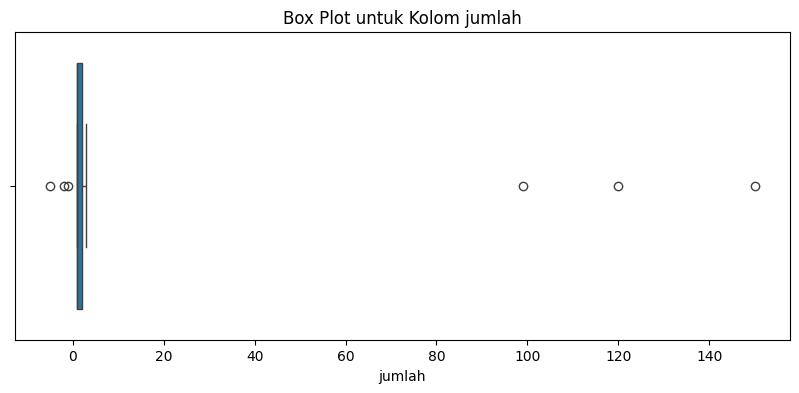



--- Analisis Outlier untuk Kolom: 'harga_satuan' ---
Q1: 346250.00, Q3: 1587500.00, IQR: 1241250.00
Batas Bawah: -1515625.00
Batas Atas: 3449375.00
Jumlah outlier terdeteksi: 7


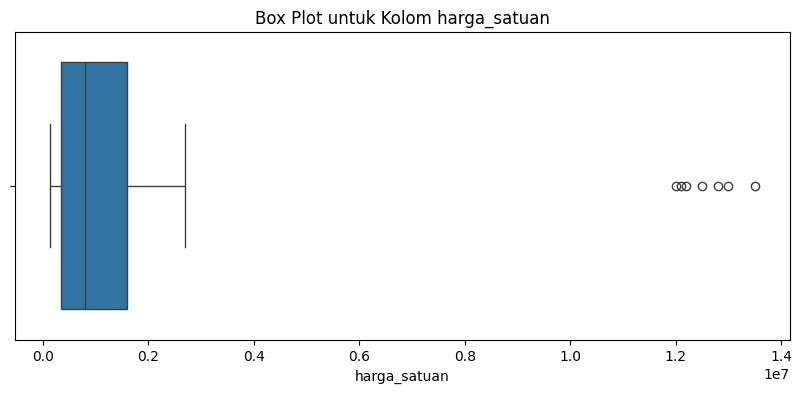



--- Analisis Outlier untuk Kolom: 'rating_produk' ---
Q1: 3.00, Q3: 5.00, IQR: 2.00
Batas Bawah: 0.00
Batas Atas: 8.00
Jumlah outlier terdeteksi: 0


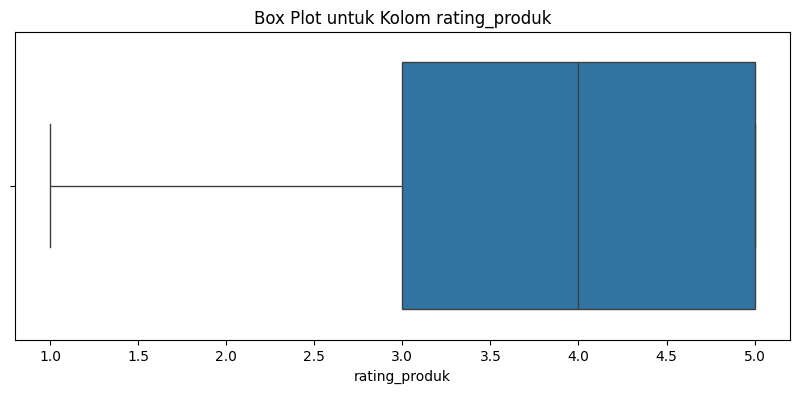

In [7]:
# Memilih kolom numerik untuk dianalisis
# df.select_dtypes() membantu memilih kolom berdasarkan tipe datanya
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
print(f"Kolom numerik yang akan dianalisis: {numeric_cols}\n")

# Looping untuk setiap kolom numerik untuk menemukan outlier
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Mengidentifikasi outlier
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"--- Analisis Outlier untuk Kolom: '{col}' ---")
    print(f"Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"Batas Bawah: {lower_bound:.2f}")
    print(f"Batas Atas: {upper_bound:.2f}")
    print(f"Jumlah outlier terdeteksi: {len(outliers)}")

    # Visualisasi dengan Box Plot untuk melihat distribusi dan outlier
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot untuk Kolom {col}')
    plt.show()
    print("\n" + "="*50 + "\n")

**Penjelasan Hasil:**

Untuk setiap kolom numerik, kode di atas menghitung batas bawah dan batas atas menggunakan metode IQR. Jumlah data yang berada di luar rentang ini dilaporkan sebagai outlier. Visualisasi box plot juga sangat membantu untuk melihat distribusi data dan outlier secara grafis (ditandai sebagai titik-titik di luar "kumis" plot). Pengetahuan tentang outlier ini penting untuk memutuskan apakah mereka perlu dihapus, ditransformasi, atau dibiarkan saja, tergantung pada konteks bisnis dan tujuan analisis.